William: Genetic Algorithm for the Traveling Salesperson

Mowhebat: Added Simulated Annealing approach + new dataset

We will be exploring various optimization methods on the traveling Salesperson Problem. The traveling salesperson is defined as such: "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?"

In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np
import matplotlib.pyplot as plt
import time

We will be using the a 3rd party library called mlrose to apply a randomized optimization algorithm to help solve the Traveling Salseperson Problem. This can be found at https://github.com/gkhayes/mlrose on github. mlrose has a pre-defined TravelingSales class which we can use by defining a fitness function and fitness object.

We shall define the cities using x,y coordinates and the distance between the pair of cities is the Euclidean distance. Beginning a simple optimization with six cities. 

In [2]:
cities = [[2,3], [3,7], [5,8], [2,6], [1,5], [3,1]]
cities = np.array(cities)
fitness_object = mlrose.TravellingSales(coords = cities)

We have to initialize a TSPOpt() object for the minimization problem.

In [3]:
minimize = mlrose.TSPOpt(length = 6, fitness_fn=fitness_object, maximize=False)

We can then use a genetic algorithm to start minimizing the problem. mlrose will return a final state which is the best route to all the cities that were provided, while the fitness score will the be the length (in terms of euclidean distance) of that route. The parameters to the genetic algorithm will be a population size of 150, mutation probability of 0.2 and a max attempts of 10.

In [4]:
final_state, final_fitness = mlrose.genetic_alg(minimize, pop_size = 150, mutation_prob = 0.2, random_state = 237658)
print("The best route to all the cities is: ", final_state)
print("The fitness score at this state is: ", final_fitness)

The best route to all the cities is:  [3 4 0 5 2 1]
The fitness score at this state is:  16.816740946526078


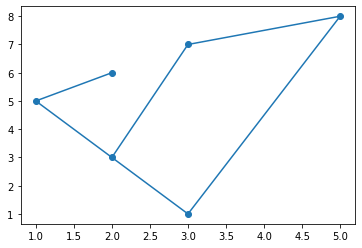

In [5]:
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([cities[final_state[i]] for i in range(len(final_state))]),np.array([cities[0]])))
# Plot the cities.
plt.scatter(cities[:,0],cities[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()

Now, we are trying to use more complex dataset. We are using the coordinate of 48 capitals of the US (att48), which can be found at http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsplib.html. 

In [6]:
# Open input file
infile = open('att48.tsp', 'r')

# Read instance header
Name = infile.readline().strip().split()[2] # NAME
Comment = infile.readline().strip().split()[2] # COMMENT
FileType = infile.readline().strip().split()[2] # TYPE
Dimension = infile.readline().strip().split()[2] # DIMENSION
EdgeWeightType = infile.readline().strip().split()[2] # EDGE_WEIGHT_TYPE
infile.readline()

# Read node list
cities = []
N = int(Dimension)
for i in range(0, N):
    x,y = infile.readline().strip().split()[1:]
    cities.append((int(x), int(y)))

# Close input file
infile.close()

In [7]:
fitness_object = mlrose.TravellingSales(coords = cities)

We have to initialize a TSPOpt() object for the minimization problem.

In [8]:
minimize = mlrose.TSPOpt(length = 48, fitness_fn=fitness_object, maximize=False)

We can then use a genetic algorithm to start minimizing the problem. mlrose will return a final state which is the best route to all the cities that were provided, while the fitness score will the be the length (in terms of euclidean distance) of that route. The parameters to the genetic algorithm will be a population size of 150, mutation probability of 0.2, and maximum attemtps of 10.

In [12]:
start_time = time.time()
final_state, final_fitness = mlrose.genetic_alg(minimize,  max_attempts=10, pop_size = 150, mutation_prob = 0.2, random_state = 237658)
elapsed_time = time.time() - start_time
print("The best route to all the cities is: ", final_state)
print("The fitness score at this state is: {0:.2f}".format(final_fitness))
print("The elapsed time is: {0:.2f}".format(elapsed_time))

The best route to all the cities is:  [19 31 21 12 27  8 14  5 41 20 11 18 13 33  1 25 44  3  9 47 34 23 36 17
 35 42 32 46 37  7  0 24 45 15 30 28  4  2 10 26 16 39 43 29 22 38  6 40]
The fitness score at this state is: 113973.69
The elapsed time is: 11.44


We are also using simulated annealing method to find the optimal path with maximum attemps of 500.

In [11]:
start_time = time.time()
final_state, final_fitness = mlrose.simulated_annealing(minimize, max_attempts=500, random_state = 237658)
elapsed_time = time.time() - start_time
print("The best route to all the cities is: ", final_state)
print("The fitness score at this state is: {0:.2f}".format(final_fitness))
print("The elapsed time is: {0:.2f}".format(elapsed_time))

The best route to all the cities is:  [31 38 20 11 32 35 27  6 17 43 14 22  4 47 41 25  3  1 10 29  5 36 18 26
 16 42 19 46 12 24 13 33  2 39  0  7  8 37 30 45 21 15 40 28  9 34 44 23]
The fitness score at this state is: 48459.59
The elapsed time is: 14.05


The optimal path for the att48 dataset (48 capitals of the US) is 13,374.

We can see that simulated annealing method find the solution much faster and with smaller route cost than genetic algorithm. 

| method | Time Elapsed(s) | Min Cost Route |
| --- | --- | --- |
| Genetic Algorithm | 11.50 | 113973.69 |
| Simulated Annealing | 13.70 | 48459.59 |